Parameters:
Launch angle (deg.)                      : 75.000
Launch speed (m/s)                       : 44.700
Drag coefficient - Spherical projectile  : 0.500
Radius of spherical projectile (m)       : 0.037
Mass of projectile (kg)                  : 0.145
Air density (kg/m^3)                     : 1.290
Cross-sectional area of projectile       : 0.004

Results:
Time of flight (s)                       : 6.608
Horizontal range (m)                     : 43.667
Maximum height (m)                       : 53.444


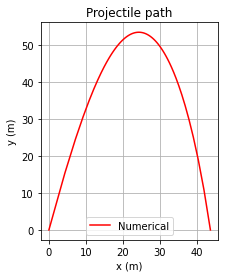

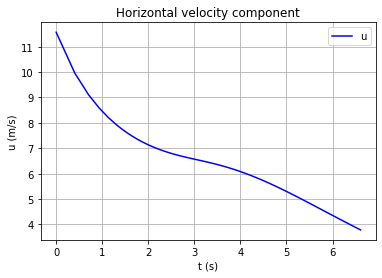

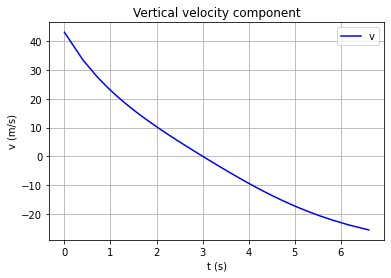

In [1]:
from math import pi, radians, degrees, sin, cos, atan, sqrt, sinh, cosh, asinh
import numpy as np
from scipy.integrate import quadrature
from scipy.optimize import newton
import matplotlib.pyplot as plt

# Parameters of projectile (Modelled after a baseball)
V_0     = 44.7                 # Initial velocity (m/s)
g       = 9.81                 # Acceleration due to gravity (m/s^2)
psi     = 75                   # Launch angle (deg.)
c       = 0.5                  # Drag coefficient (spherical projectile)
r       = 0.0366               # Radius of projectile (m)
m       = 0.145                # Mass of projectile (kg)
rho_air = 1.29                 # Air density (kg/m^3)
a       = pi * r**2.0          # Cross-sectional area of projectile (m^2)
psi     = radians(psi)         # Convert to radians

# Display of parameters
print('Parameters:')
print('Launch angle (deg.)                      : {:.3f}'.format(degrees(psi)))
print('Launch speed (m/s)                       : {:.3f}'.format(V_0))
print('Drag coefficient - Spherical projectile  : {:.3f}'.format(c))
print('Radius of spherical projectile (m)       : {:.3f}'.format(r))
print('Mass of projectile (kg)                  : {:.3f}'.format(m))
print('Air density (kg/m^3)                     : {:.3f}'.format(rho_air))
print('Cross-sectional area of projectile       : {:.3f}'.format(a))

# Initial position and launch velocity
x_0 = 0.0
u_0 = V_0 * cos(psi)
y_0 = 0.0
v_0 = V_0 * sin(psi)

# Constants and function definitions for solution
mu = 0.5 * c * rho_air * a / m
Q_0 = asinh(v_0 / u_0)
A   = g / (mu * u_0**2.0) + (Q_0 + 0.5 * sinh(2.0 * Q_0))

def lam(Q):
    return A - (Q + 0.5 * sinh(2.0 * Q))

def u_s(Q):
    return sqrt(g / mu) / sqrt(lam(Q))

def v_s(Q):
    return sqrt(g / mu) * sinh(Q) / sqrt(lam(Q))

def f_t(Q):
    return cosh(Q) / sqrt(lam(Q))

def f_x(Q):
    return cosh(Q) / lam(Q)

def f_y(Q):
    return sinh(2.0 * Q) / lam(Q)

def t_s(Q):
    return - quadrature(f_t, Q_0, Q, vec_func=False)[0] / sqrt(g * mu)

def x_s(Q):
    return x_0 - quadrature(f_x, Q_0, Q, vec_func=False)[0] / mu

def y_s(Q):
    return y_0 - quadrature(f_y, Q_0, Q, vec_func=False)[0] / (2.0 * mu)

def y_s_p(Q):
    return -(1.0 / (2.0 * mu)) * sinh(2.0 * Q) / lam(Q)

# Time of flight
Q_T_est = asinh(-v_0 / u_0)      # Initial estimate for Newton's method
Q_T = newton(y_s, Q_T_est, y_s_p)
T = t_s(Q_T)
print('\nResults:')
print('Time of flight (s)                       : {:.3f}'.format(T))

# Horizontal range
R = x_s(Q_T)
print('Horizontal range (m)                     : {:.3f}'.format(R))

# Maximum height
H = y_s(0.0)
print('Maximum height (m)                       : {:.3f}'.format(H))

# Vectorize scalar functions
t_vec = np.vectorize(t_s)
x_vec = np.vectorize(x_s)
y_vec = np.vectorize(y_s)
u_vec = np.vectorize(u_s)
v_vec = np.vectorize(v_s)

# Array for variable 'Q'
N = 101
psi_T = degrees(atan(sinh(Q_T)))
Q = np.arcsinh(np.tan(np.radians(np.linspace(degrees(psi), psi_T, N))))

# Arrays for projectile path variables
t = t_vec(Q)
x = x_vec(Q)
y = y_vec(Q)
u = u_vec(Q)
v = v_vec(Q)

# Plot of trajectory
fig, ax = plt.subplots()
line, = ax.plot(x, y, 'r-', label='Numerical')
ax.set_title(r'Projectile path')
ax.set_aspect('equal')
ax.grid(b=True)
ax.legend()
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
plt.show()

# Plot of velocity components
fig, ax = plt.subplots()
line, = ax.plot(t, u, 'b-', label='u')
ax.set_title(r'Horizontal velocity component')
ax.grid(b=True)
ax.legend()
ax.set_xlabel('t (s)')
ax.set_ylabel('u (m/s)')
plt.show()

fig, ax = plt.subplots()
line, = ax.plot(t, v, 'b-', label='v')
ax.set_title(r'Vertical velocity component')
ax.grid(b=True)
ax.legend()
ax.set_xlabel('t (s)')
ax.set_ylabel('v (m/s)')
plt.show()